# Hack The Markets - EDA

### 1. Exploratory data analysis

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
eurolibra = pd.read_csv("./data_individual_challenge.csv", sep = ";")

In [121]:
eurolibra.shape

(1035, 9)

**El dataset está formado por 1035 registros y 8 columnas**, sin filas duplicadas.

In [122]:
duplicate_rows = eurolibra[eurolibra.duplicated()]
print("Number of duplicate rows in the dataset: ", duplicate_rows.shape)

Number of duplicate rows in the dataset:  (0, 9)


In [124]:
eurolibra.describe()

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
count,1035.000000,1035.000000,1035.000000,1035.000000,1021.000000,1022.000000,994.000000,1021.000000
mean,54.802227,62.775776,76.327544,59.336179,51.264480,0.767037,0.767578,2.155019
std,193.425540,209.802582,226.985729,204.314143,10.268314,0.097296,0.093424,1.480081
min,0.578300,0.587600,0.006600,0.578400,19.171099,0.598982,0.607234,1.006340
25%,0.683300,0.688375,0.678200,0.682750,44.383073,0.680563,0.682325,1.467247
50%,0.800900,0.806430,0.798400,0.798830,50.741770,0.789053,0.783807,1.840244
75%,0.874650,0.881685,0.869890,0.874000,57.693333,0.859042,0.856121,2.235330
max,892.000000,934.000000,899.000000,921.000000,79.522395,0.903959,0.889572,17.421381


Realizando una descripción del dataset, observando la media de los valores de cada columna con su desviación estándar, valores mínimos y máximos que toman cada variable y los cuartiles.

In [125]:
eurolibra.isna().sum()

Date           0
Open           0
High           0
Low            0
Close          0
rsi           14
ema_fast      13
ema_slow      41
volatility    14
dtype: int64

In [126]:
eurolibra.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
rsi           float64
ema_fast      float64
ema_slow      float64
volatility    float64
dtype: object

Se observan columnas de tipo objeto, decimal (float) y entero (int). A partir de aquí, transformo la variable 'Date' en tipo datetime (con el formato YYYY-mm-dd)

In [127]:
eurolibra['Date'] = pd.to_datetime(eurolibra['Date'], format='%Y-%m-%d')

In [136]:
eurolibra.head(15)

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.6281,633.00000,0.6235,0.6272,0.000000,0.000000,0.0,0.000000
1,2000-01-10,0.6271,629.00000,0.6181,0.6197,0.000000,0.000000,0.0,0.000000
2,2000-01-17,0.6200,0.62250,0.6072,609.0000,0.000000,0.000000,0.0,0.000000
3,2000-01-24,0.6091,0.61271,599.0000,0.6027,0.000000,0.000000,0.0,0.000000
4,2000-01-31,0.6021,0.62670,598.0000,0.6158,0.000000,0.000000,0.0,0.000000
5,2000-02-07,0.6166,0.62090,0.6102,0.6192,0.000000,0.000000,0.0,0.000000
6,2000-02-14,0.6192,0.62320,0.6117,0.6157,0.000000,0.000000,0.0,0.000000
7,2000-02-21,0.6161,0.62650,0.6100,0.6114,0.000000,0.000000,0.0,0.000000
8,2000-02-28,0.6117,0.61740,0.5929,606.0000,0.000000,0.000000,0.0,0.000000
9,2000-03-06,0.6059,0.61320,602.0000,0.6102,0.000000,0.000000,0.0,0.000000


Se observan **missing values en 4 variables** distintas del dataset. Debido a que el dataset contiene las variables 'ema_fast' y 'ema_slow', describiendo el *moving average* de 14 semanas y 42 semanas respectivamente, justifica los valores faltantes de las primeras 13 semanas para 'ema_fast' y 41 semanas para 'ema_slow'. 

Para lidiar con estos MV, procedo a sustituir todos aquellos valores NaN por el valor 0 (a la hora de realizar el modelo predictivo cabe valorar si sustituir los NaN por el valor medio de cada columna o valorar la eliminación de las filas).

In [129]:
eurolibra = eurolibra.fillna(0)

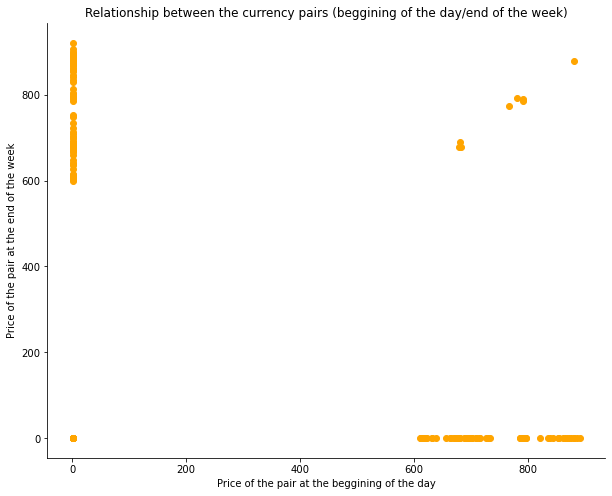

In [169]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(eurolibra['Open'], eurolibra['Close'], color='orange')
ax.set_xlabel('Price of the pair at the beggining of the day')
ax.set_ylabel('Price of the pair at the end of the week')
plt.title('Relationship between the currency pairs (beggining of the day/end of the week)')
  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Realizo un gráfico para averiguar la relación entre el precio del par al principio de la semana y al final. En él se observan 4 comportamientos distintos:


- Cuadrante superior derecha: corresponden a precios elevados del par, tanto al inicio como al final, donde no se muestran variaciones del valor.

- Cuadrante inferior izquierda: corresponden a precios bajos del par, tanto al inicio como al final, donde no se muestran variaciones del valor. Al tratarse de pocos valores, lo considero outlier en el dataset.

- Cuadrante superior izquierda: se muestran valores de precio del par bajos a inicio de semana, los cuales han aumentado al finalizar la semana. Ha habido un incremento del precio del par.

- Cuadrante inferior derecha: se muestran valores de precio del par elevados a inicio de semana, los cuales han disminuido considerablemente al finalizar la semana. Ha habido un descenso del precio del par.

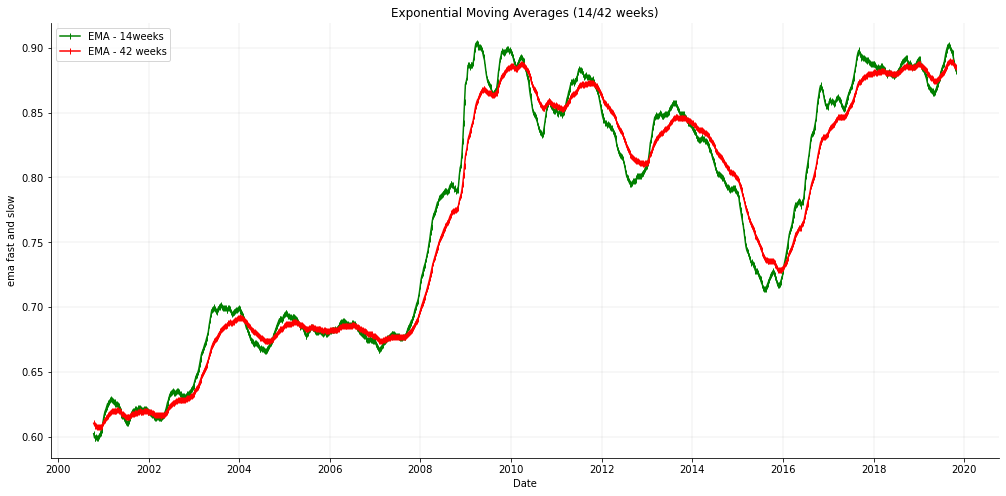

In [190]:
# Creo un nuevo dataset a partir de la fila 41, para eliminar los valores faltantes del inicio
ema = eurolibra[41:]

fig,ax=plt.subplots(figsize=(17,8))
ax.plot(ema.Date, ema.ema_fast, marker="|", color='green', label='EMA - 14weeks')
ax.plot(ema.Date, ema["ema_slow"], marker="|", color='red',  label='EMA - 42 weeks')

plt.title('Exponential Moving Averages (14/42 weeks)')
ax.set_xlabel("Date")
ax.set_ylabel("ema fast and slow")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.legend()

plt.show()

En el gráfico se representa la media móvil exponencial (EMA) tomando el valor promedio de 14 semanas (ema_fast) y 42 semanas (ema_slow). Se observa un descenso de los valores durante el año 2016, período en el cual se inició el referéndum para la salida de Reino Unido de la UE.

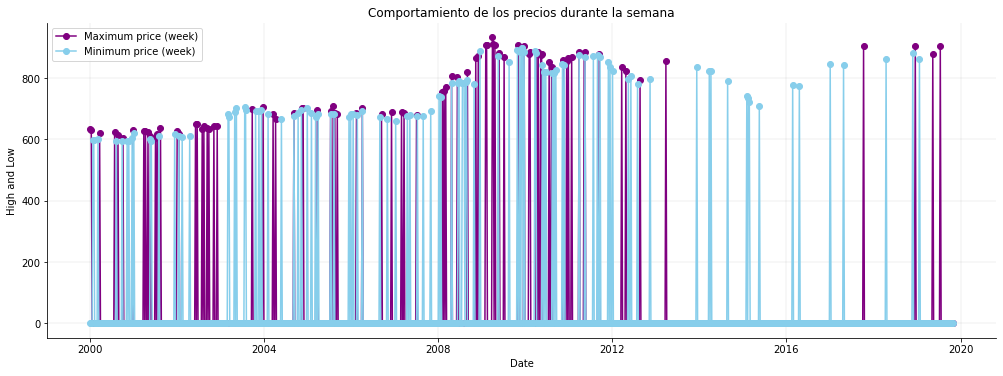

In [189]:
fig,ax=plt.subplots(figsize=(17,5.8))
ax.plot(eurolibra.Date, eurolibra.High, marker="o", color='purple', label='Maximum price (week)')
ax.plot(eurolibra.Date, eurolibra.Low, marker="o", color='skyblue',  label='Minimum price (week)')

plt.title('Comportamiento de los precios durante la semana')
ax.set_xlabel("Date")
ax.set_ylabel("High and Low")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.legend()

plt.show()

In [191]:
# Unfinished analysis